### Implement and compare different training algorithms for pattern association, such as Hebbian learning, delta rule, and backpropagation. Apply these algorithms to a simple pattern recognition task.

For simple pattern recgnition here we are using the XOR output pattern

Hebbian Learning Predictions:
[[0]
 [1]
 [1]
 [1]]

Delta Rule Predictions:
[1 0 0 0]


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Backpropagation Predictions:
[[0]
 [1]
 [0]
 [0]]


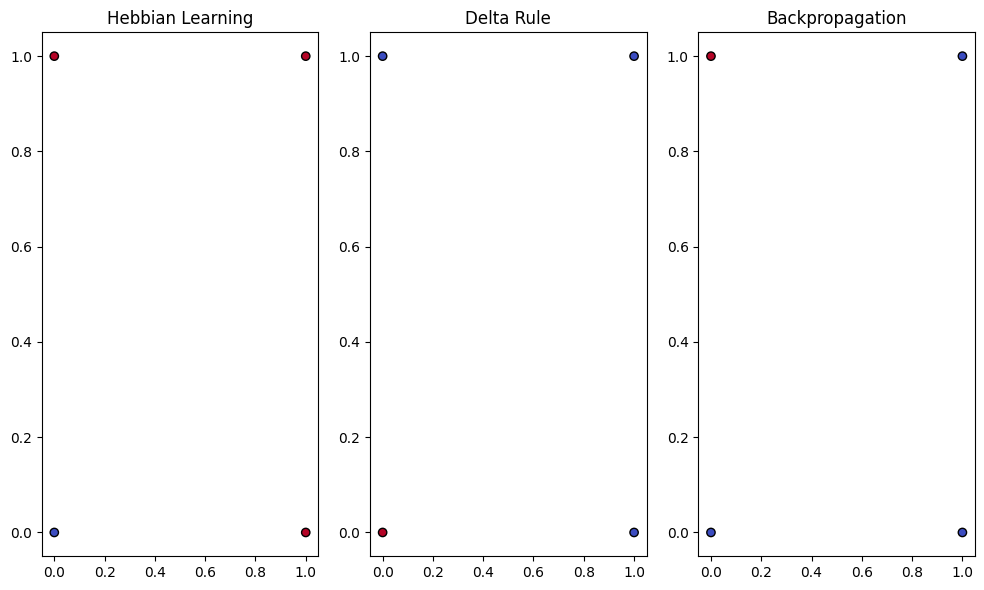

In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])  # XOR output

# Hebbian Learning
class HebbianNetwork:
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(input_size, output_size)

    def train(self, X, y, lr=0.1):
        for i in range(len(X)):
            self.weights += lr * np.dot(X[i][:, np.newaxis], y[i][:, np.newaxis].T)

    def predict(self, X):
        return np.dot(X, self.weights) > 0


# Delta Rule (Perceptron Learning)
class PerceptronDeltaRule:
    def __init__(self, input_size):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()

    def activation(self, x):
        return 1 if x > 0 else 0

    def predict(self, X):
        return np.array([self.activation(np.dot(x, self.weights) + self.bias) for x in X])

    def train(self, X, y, lr=0.1, epochs=100):
        for epoch in range(epochs):
            for xi, target in zip(X, y):
                update = lr * (target - self.activation(np.dot(xi, self.weights) + self.bias))
                self.weights += update * xi
                self.bias += update


# Backpropagation using TensorFlow (Multi-layer Perceptron)
def build_backprop_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_dim=2, activation='relu'),  # Hidden layer
        tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
    ])
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Train Hebbian Network
hebb_net = HebbianNetwork(2, 1)
hebb_net.train(X, y)

# Predict with Hebbian Network
hebbian_pred = hebb_net.predict(X)
print("Hebbian Learning Predictions:")
print(hebbian_pred.astype(int))

# Train Delta Rule Perceptron
delta_net = PerceptronDeltaRule(2)
delta_net.train(X, y.flatten())

# Predict with Delta Rule Perceptron
delta_pred = delta_net.predict(X)
print("\nDelta Rule Predictions:")
print(delta_pred)

# Train Backpropagation (MLP)
backprop_model = build_backprop_model()
backprop_model.fit(X, y, epochs=200, verbose=0)

# Predict with Backpropagation Model
backprop_pred = backprop_model.predict(X)
backprop_pred = (backprop_pred > 0.5).astype(int)
print("\nBackpropagation Predictions:")
print(backprop_pred)

# Visualization (optional)
def plot_results():
    plt.figure(figsize=(10, 6))

    # Plot Hebbian predictions
    plt.subplot(1, 3, 1)
    plt.title("Hebbian Learning")
    plt.scatter(X[:, 0], X[:, 1], c=hebbian_pred.flatten(), cmap='coolwarm', marker='o', edgecolor='k')

    # Plot Delta Rule predictions
    plt.subplot(1, 3, 2)
    plt.title("Delta Rule")
    plt.scatter(X[:, 0], X[:, 1], c=delta_pred, cmap='coolwarm', marker='o', edgecolor='k')

    # Plot Backpropagation predictions
    plt.subplot(1, 3, 3)
    plt.title("Backpropagation")
    plt.scatter(X[:, 0], X[:, 1], c=backprop_pred.flatten(), cmap='coolwarm', marker='o', edgecolor='k')

    plt.tight_layout()
    plt.show()

# Call the plot function (if you want to visualize the results)
plot_results()
